In [1]:
from langchain_community.document_loaders import PyPDFLoader
from dotenv import load_dotenv
from pyzerox import zerox
load_dotenv()


True

In [2]:
pdf_file_path = "./income_tax.pdf"
MODEL_NAME = "gemma2-9b-it"

loader = PyPDFLoader(pdf_file_path)

pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [3]:
pages[35]

Document(metadata={'source': './income_tax.pdf', 'page': 35, 'page_label': '36'}, page_content='법제처                                                            36                                                       국가법령정보센터\n소득세법\n② 거주자의 퇴직소득에 대한 소득세는 다음 각 호의 순서에 따라 계산한 금액(이하 “퇴직소득 산출세액”이라 한다\n)으로 한다.<개정 2013. 1. 1., 2014. 12. 23.>\n1. 해당 과세기간의 퇴직소득과세표준에 제1항의 세율을 적용하여 계산한 금액\n2. 제1호의 금액을 12로 나눈 금액에 근속연수를 곱한 금액\n3. 삭제<2014. 12. 23.>\n[전문개정 2009. 12. 31.]\n \n           제2관 세액공제 <개정 2009. 12. 31.>\n \n제56조(배당세액공제) ① 거주자의 종합소득금액에 제17조제3항 각 호 외의 부분 단서가 적용되는 배당소득금액이 합\n산되어 있는 경우에는 같은 항 각 호 외의 부분 단서에 따라 해당 과세기간의 총수입금액에 더한 금액에 해당하는\n금액을 종합소득 산출세액에서 공제한다. <개정 2009. 12. 31.>\n② 제1항에 따른 공제를 “배당세액공제”라 한다.<개정 2009. 12. 31.>\n③ 삭제<2003. 12. 30.>\n④ 제1항을 적용할 때 배당세액공제의 대상이 되는 배당소득금액은 제14조제2항의 종합소득과세표준에 포함된 배\n당소득금액으로서 이자소득등의 종합과세기준금액을 초과하는 것으로 한다.<개정 2009. 12. 31.>\n⑤ 삭제<2006. 12. 30.>\n⑥ 배당세액공제액의 계산 등에 필요한 사항은 대통령령으로 정한다.<개정 2009. 12. 31.>\n[제목개정 2009. 12. 31.]\n \n제56조의2(기장세액공제) ① 제160조제3항에 따른 간편장

In [4]:
import json
import asyncio
import nest_asyncio
nest_asyncio.apply()

In [ ]:

custom_system_prompt = None
kwargs = {}
async def main():
    pdf_file_path = "./income_tax.pdf"

    select_pages = None
    output_dir = "./documents"
    model = "vertex_ai/gemini-1.5-flash-001"
    result = await zerox(file_path=pdf_file_path, model=model, output_dir=output_dir,
                        custom_system_prompt=custom_system_prompt, select_pages=select_pages, **kwargs)
    
    return result


result = asyncio.run(main())

print(result)

# 마크다운 로더

In [5]:
from langchain_community.document_loaders import UnstructuredMarkdownLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.documents import Document

In [6]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500, 
    chunk_overlap = 100,
    separators=['\n\n','\n']
)

In [13]:
markdown_path ="./documents/income_tax.md"
loader = UnstructuredMarkdownLoader(markdown_path)
document_list = loader.load_and_split(text_splitter)

In [32]:
document_list[40]
# 표가 짤림 
# 정확한 컨텍스트 전달하기 위해 -> md -> TXT 변환- > 로드


Document(metadata={'source': './documents/income_tax.md'}, page_content='제2절 세액의 계산 <개정 2009. 12. 31.> 제1관 세율 <개정 2009. 12. 31.>\n\n제55조(세율) 거주자의 종합소득에 대한 소득세는 해당 연도의 종합소득과세표준에 다음의 세율을 적용하여 계산한 금액(이하 "종합소득과세표준세액"이라 한다)을 그 세액으로 한다. <개정 2014. 1. 1., 2016. 12. 20., 2017. 12. 19., 2020. 12. 29., 2022. 12. 31.>\n\n종합소득 ┌───────────────┐ │ 과세표준의 6개 구간 │ ├───────────────┤ │ 1,400만원 이하 │ 84만원 + (1,400만원을 초과하는 금액의 15%) │ │ 1,400만원 초과 │ 84만원 + (5,000만원을 초과하는 금액의 24%) │ │ 8,800만원 이하 │ 624만원 + (5,000만원을 초과하는 금액의 24%) │ │ 8,800만원 초과 │ 1,536만원 + (8,800만원을 초과하는 금액의 35%) │ │ 1.5억원 초과 │ 4,046만원 + (1,500만원을 초과하는 금액의 38%) │ │ 3억원 초과 │ 6,460만원 + (3억원을 초과하는 금액의 40%) │ │ 5억원 초과 │ 14,760만원 + (5억원을 초과하는 금액의 42%) │ │ 10억원 초과 │ 38,406만원 + (10억원을 초과하는 금액의 45%) │ └───────────────┘\n\n② 거주자의 퇴직소득에 대한 소득세는 다음 각 호의 순서에 따라 계산한 금액(이하 ‘퇴직소득 산출세액’이라 한다)으로 한다. <개정 2013. 1. 1., 2014. 12. 23.> 1. 해당 과세기간의 퇴직소득과세표준 제1항의 세율을 적용하여 계산한 금액 2. 제1호의 금액을 12로 나눈 금액에 근속연수를 곱한 금액 3. 삭제<2014. 12. 23.> [전문개정 2009. 12. 31.]\n\n제2관 세액공제 

In [10]:
import markdown
from bs4 import BeautifulSoup

text_path = './documents/income_tax.txt'

In [11]:
markdown_path ="./documents/income_tax.md"

# 마크다운 파일
with open(markdown_path, 'r', encoding='utf-8') as md_file:
    md_content = md_file.read()

# 마크다운 콘텐츠를 HTML로 변환
html_content = markdown.markdown(md_content)

# HTML 콘텐츠를 파싱하여 텍스트만 추출합니다
soup = BeautifulSoup(html_content, 'html.parser')
text_content = soup.get_text()

# 추출한 텍스트를 텍스트 파일로 저장
with open(text_path, 'w', encoding='utf-8') as txt_file:
    txt_file.write(text_content)

print("Markdown converted to plain text successfully!")

Markdown converted to plain text successfully!


In [14]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader(text_path, encoding='utf-8')
document_list = loader.load_and_split(text_splitter)

In [30]:
# 제 55조 과세표준 6구간 
document_list[47]

Document(metadata={'source': './documents/income_tax.txt'}, page_content='② 제70조제1항, 제70조의2에 따른 제74조에 따라 차례로 할 것이 제70조제1항제2호에 따르며 서류를 제출하여야 한다는 경우에는 기준소득 중 거주자 본인이 된다(분산)과 제70조제2와 제74조에 따른 제료 및 제대법을 포함한다. 단, 차별제표청정인 그 업체를 남겨 제출한 경우로 그에 대하여 아니하다.<개정 2013. 1. 1.>\n  ③ 제80조에 따른 수익과 관련의 경우에는 기초공제 중 거주자 본인이 된다(분산)과 그에 관한 적지사항을 분명히 한다.\n[전문개정 2009. 12. 31.]\n[제목개정 2014. 1. 1.]\n제54조의2(공동사업에 대한 소득공제 등 특례) 제51조의3 또는 「조세특례제한법」에 따른 소득공제를 적용하거나 제59조의2에 따른 세액감면을 적용하는 경우 제54조제3항에 따라 공동사업자의 소득에 합산과세되는 특별세액거래의 지출․납입․투자 등의 금액이 있을 경우 주된 공동사업자의 소득에 합산과세되는 소득금액에 합산되어 주된 공동사업자의 합산과세세액은 공동사업소득액 또는 공동사업창출세액을 계산할 때 소득공제 또는 세액공제를 받을 수 있다. \n[개정 2014. 1. 1.]\n[전문개정 2009. 12. 31.]\n[제목개정 2014. 1. 1.]\n제2절 세액의 계산 <개정 2009. 12. 31.>\n제1관 세율 <개정 2009. 12. 31.>\n제55조(세율) 거주자의 종합소득에 대한 소득세는 해당 연도의 종합소득과세표준에 다음의 세율을 적용하여 계산한 금액(이하 "종합소득과세표준세액"이라 한다)을 그 세액으로 한다. <개정 2014. 1. 1., 2016. 12. 20., 2017. 12. 19., 2020. 12. 29., 2022. 12. 31.>\n종합소득\n┌───────────────┐\n│ 과세표준의 6개 구간 │\n├───────────────┤\n│ 1,400만원 이하       

# 엠베딩

In [33]:
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_chroma import Chroma

In [34]:
embeddings_model = HuggingFaceEmbeddings(
    model_name='jhgan/ko-sroberta-nli',
    model_kwargs={'device':'cpu'},
    encode_kwargs={'normalize_embeddings':True},
)

embeddings_model

c:\USERS\USER\DESKTOP\FINBRAINAGENT\VENV\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\USERS\USER\DESKTOP\FINBRAINAGENT\VENV\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user\.cache\huggingface\hub\models--jhgan--ko-sroberta-nli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to acti

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: RobertaModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
), model_name='jhgan/ko-sroberta-nli', cache_folder=None, model_kwargs={'device': 'cpu'}, encode_kwargs={'normalize_embeddings': True}, multi_process=False, show_progress=False)

# 벡터스토어

In [36]:
vector_store = Chroma.from_documents(
    documents=document_list,
    embedding=embeddings_model,
    collection_name = "income_tax_collection",
    persist_directory = "./income_tax_collection"
)

# 리트리버

In [37]:
retriever = vector_store.as_retriever(search_kwargs = {"k" : 3})

In [38]:
query = "연봉 3000만원 직장인 소득세는?"

retriever.invoke(query)

[Document(id='753a376c-9ab4-4e78-9678-a74c87f1fa94', metadata={'source': './documents/income_tax.txt'}, page_content='법제처 130 국가법령정보센터\n소속세벤\n➄ 제1항에도 불구하고 추가 남부세액이 10만 원을 초과하는 경우 원천징수의무자는 해당 과세기간의 다음 연도 2월분부터 4월분까지 근로소득을 지급할 때마다 추가 남부세액을 나누어 원천징수할 수 있다. <신설 2015. 3. 10.> [전문개정 2010. 12. 27.]\n제137조(2건 이상으로부터 근로소득을 받는 사람에 대한 근로소득세의 연말정산)\n① 2인 이상으로부터 근로소득을 받는 사람(일용근로자는 제외한다)이 대통령령으로 정하는 바에 따라 주된 근무지와 종된 근무지를 정하여 종된 근무지의 원천징수의무자로부터 제143조제1항에 따른 근로소득의 원천징수의무를 발행받아 해당 과세기간의 다음 연도 2월분에 근로소득을 받기 전에 주된 근무지의 원천징수의무자에게 제출하는 경우 주된 근무지의 근로소득에 대한 금액에 대하여 제137조에 따른 소득세를 원천징수한다.\n② 제1항에 따라 근로소득 원천징수영수증을 발급하는 주된 근무지의 원천징수의무자는 해당 과세기간의 근로소득금액에 기본세율을 적용하여 계산한 소득세산출세액에 대해 제134조제1항에 따라 원천징수의무를 현출지급한다.\n③ 제150조제3항에 따라 남의체험에 의하여 소득세 장수제127조제1항제1호 각 목에 따른 근로소득과 다른 근로소득이 함께 있는 사람(일용근로자는 제외한다)에게 근로소득세의 연말정산에 관하여 제1항과 제2항을 준용한다. [본소설 2010. 12. 27.]\n제138조(자회세자에 대한 근로소득세의 연말정산)\n➀ 해당 과세기간 중에 퇴직하는 경우 1월부터 과세기간이 끝날 때까지 받은 근로소득을 포함하여 제140조 제1항에 따라 근로소득세 소속ㆍ새의 공제신고서를 제출하는 경우 원천징수의무자는 그 근로소득이 중에서 받은 근로소득과 별도로 근무지에 받

In [49]:
from typing_extensions import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [74]:
class AgentState(TypedDict):
    query: str
    context: List[Document]
    answer: str

In [75]:
graph_builder = StateGraph(AgentState)



In [76]:
# retrieve Node

def retrieve(state : AgentState):
    query = state["query"]
    docs = retriever.invoke(query)
    return {"context" : docs}

In [77]:
from langchain import hub
from langchain_groq import ChatGroq
import os 

groq_api_key = os.getenv("GROQ_API_KEY")
MODEL_NAME = "gemma2-9b-it"

prompt = hub.pull("rlm/rag-prompt")


llm = ChatGroq(model_name=MODEL_NAME, api_key=groq_api_key)

In [78]:
# generate node

def generate(state: AgentState):
    context=  state["context"]
    query = state["query"]

    # rag chain
    rag_chain = prompt | llm

    response= rag_chain.invoke({"question" : query, "context" : context})
    return {'answer' : response}

In [79]:
graph_builder.add_node("retrieve", retrieve)
graph_builder.add_node("generate", generate)
graph_builder.add_edge(START, "retrieve")
graph_builder.add_edge("retrieve", "generate")
graph_builder.add_edge("generate", END)

graph = graph_builder.compile()

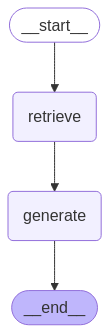

In [80]:
from IPython.display import Image, display

display(
    Image(
        graph.get_graph(xray=True).draw_mermaid_png()
    )
)



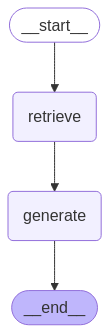

In [61]:
# 노드 순서가 일방향이면 add_sequence 써도 똑같음

sequence_graph_builder= StateGraph(AgentState).add_sequence([retrieve, generate])

# 노드는 함수명으로 똑같이 만들어버림 
sequence_graph_builder.add_edge(START, "retrieve")
sequence_graph_builder.add_edge("generate", END)

sequence_graph = sequence_graph_builder.compile()

display(
    Image(
        sequence_graph.get_graph(xray=True).draw_mermaid_png()
    )
)


In [81]:
initial_state = {"query" : query}
graph.invoke(initial_state)

{'query': '연봉 3000만원 직장인 소득세는?',
 'context': [Document(id='753a376c-9ab4-4e78-9678-a74c87f1fa94', metadata={'source': './documents/income_tax.txt'}, page_content='법제처 130 국가법령정보센터\n소속세벤\n➄ 제1항에도 불구하고 추가 남부세액이 10만 원을 초과하는 경우 원천징수의무자는 해당 과세기간의 다음 연도 2월분부터 4월분까지 근로소득을 지급할 때마다 추가 남부세액을 나누어 원천징수할 수 있다. <신설 2015. 3. 10.> [전문개정 2010. 12. 27.]\n제137조(2건 이상으로부터 근로소득을 받는 사람에 대한 근로소득세의 연말정산)\n① 2인 이상으로부터 근로소득을 받는 사람(일용근로자는 제외한다)이 대통령령으로 정하는 바에 따라 주된 근무지와 종된 근무지를 정하여 종된 근무지의 원천징수의무자로부터 제143조제1항에 따른 근로소득의 원천징수의무를 발행받아 해당 과세기간의 다음 연도 2월분에 근로소득을 받기 전에 주된 근무지의 원천징수의무자에게 제출하는 경우 주된 근무지의 근로소득에 대한 금액에 대하여 제137조에 따른 소득세를 원천징수한다.\n② 제1항에 따라 근로소득 원천징수영수증을 발급하는 주된 근무지의 원천징수의무자는 해당 과세기간의 근로소득금액에 기본세율을 적용하여 계산한 소득세산출세액에 대해 제134조제1항에 따라 원천징수의무를 현출지급한다.\n③ 제150조제3항에 따라 남의체험에 의하여 소득세 장수제127조제1항제1호 각 목에 따른 근로소득과 다른 근로소득이 함께 있는 사람(일용근로자는 제외한다)에게 근로소득세의 연말정산에 관하여 제1항과 제2항을 준용한다. [본소설 2010. 12. 27.]\n제138조(자회세자에 대한 근로소득세의 연말정산)\n➀ 해당 과세기간 중에 퇴직하는 경우 1월부터 과세기간이 끝날 때까지 받은 근로소득을 포함하여 제140조 제1항에 따라 근로소득세 소속ㆍ새의 공제신고서를 제출하

# 답변 생성전에 검증 후,  retrieve 필요하면 다시 하기